In [ ]:
# Check the NVIDIA driver version
!nvidia-smi

# Check the CUDA version
!nvcc --version

# Verify CUDA is available in PyTorch
import torch
print(torch.cuda.is_available())
print(torch.version.cuda)

Tue Apr 23 19:17:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
pip install tensorflow


In [ ]:
!unzip -q /content/PotholeClassification.v2i.folder.zip -d ./

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image dimensions
img_width, img_height = 150, 150

# Directories
train_data_dir = '/content/Pothole Classification.v2i.folder/train'                #Replace with the train folder path 
validation_data_dir = '/content/Pothole Classification.v2i.folder/valid'            #Replace with the validation images folder path 
test_data_dir = '/content/Pothole Classification.v2i.folder/test'                   #Replace with the test images folder path 

# Hyperparameters
batch_size = 16
epochs = 10

# Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

# Save the model
model.save('pothole_detection_model.h5')


Found 1794 images belonging to 2 classes.
Found 236 images belonging to 2 classes.
Epoch 1/10
112/112 [==============================] - 23s 152ms/step - loss: 0.1827 - accuracy: 0.9691 - val_loss: 2.2656 - val_accuracy: 0.5402
Epoch 2/10
112/112 [==============================] - 17s 147ms/step - loss: 0.1169 - accuracy: 0.9702 - val_loss: 0.7555 - val_accuracy: 0.5357
Epoch 3/10
112/112 [==============================] - 16s 147ms/step - loss: 0.0977 - accuracy: 0.9741 - val_loss: 0.9041 - val_accuracy: 0.6830
Epoch 4/10
112/112 [==============================] - 17s 151ms/step - loss: 0.0812 - accuracy: 0.9781 - val_loss: 2.3179 - val_accuracy: 0.6250
Epoch 5/10
112/112 [==============================] - 16s 142ms/step - loss: 0.0848 - accuracy: 0.9786 - val_loss: 0.8586 - val_accuracy: 0.7500
Epoch 6/10
112/112 [==============================] - 16s 147ms/step - loss: 0.0705 - accuracy: 0.9814 - val_loss: 1.0226 - val_accuracy: 0.6920
Epoch 7/10
112/112 [===========================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to your test set
test_data_dir = '/content/Pothole Classification.v2i.folder/test'

# Load the saved model
model = load_model('pothole_detection_model.h5')

# Prepare your test images in the same way as your training and validation images
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=False)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // 20)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)


Found 231 images belonging to 2 classes.
11/11 [==============================] - 1s 49ms/step - loss: 0.8867 - accuracy: 0.7864
Test accuracy: 0.7863636612892151
Test loss: 0.8866792321205139


In [ ]:

import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image dimensions
img_width, img_height = 150, 150

# Define input shape for MobileNetV2
input_shape = (img_width, img_height, 3)

batch_size=16
epochs=11

# Load the base MobileNetV2 model, excluding its top (fully connected) layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the base model to prevent them from being updated during training
for layer in base_model.layers:
    layer.trainable = False

# Create the model's top layers
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Training and validation generators
train_generator = train_datagen.flow_from_directory(
    '/content/Pothole Classification.v2i.folder/train',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/Pothole Classification.v2i.folder/valid',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Save the model
model.save('pothole_detection_model_with_pretrained.h5')


9406464/9406464 [==============================] - 0s 0us/step
Found 1794 images belonging to 2 classes.
Found 236 images belonging to 2 classes.
Epoch 1/11
112/112 [==============================] - 26s 166ms/step - loss: 1.7240 - accuracy: 0.9702 - val_loss: 6.0102 - val_accuracy: 0.8571
Epoch 2/11
112/112 [==============================] - 16s 143ms/step - loss: 0.4222 - accuracy: 0.9865 - val_loss: 2.5241 - val_accuracy: 0.9152
Epoch 3/11
112/112 [==============================] - 17s 151ms/step - loss: 0.2033 - accuracy: 0.9904 - val_loss: 1.8037 - val_accuracy: 0.9241
Epoch 4/11
112/112 [==============================] - 16s 147ms/step - loss: 0.1742 - accuracy: 0.9899 - val_loss: 0.5797 - val_accuracy: 0.9554
Epoch 5/11
112/112 [==============================] - 17s 153ms/step - loss: 0.1312 - accuracy: 0.9854 - val_loss: 1.1320 - val_accuracy: 0.9152
Epoch 6/11
112/112 [==============================] - 16s 146ms/step - loss: 0.0313 - accuracy: 0.9949 - val_loss: 0.9154 - val_a

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


MOBILE NET WITH TIME MODULE

In [ ]:
import time
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image dimensions
img_width, img_height = 150, 150

# Define input shape for MobileNetV2
input_shape = (img_width, img_height, 3)

batch_size=16
epochs=11

# Load the base MobileNetV2 model, excluding its top (fully connected) layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the base model to prevent them from being updated during training
for layer in base_model.layers:
    layer.trainable = False

# Create the model's top layers
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Training and validation generators
train_generator = train_datagen.flow_from_directory(
    '/content/Pothole Classification.v2i.folder/train',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/Pothole Classification.v2i.folder/valid',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

start_time = time.time()
# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

end_time = time.time()

total_time = end_time - start_time
print(f"Training time: {total_time} seconds")
# Save the model
model.save('pothole_detection_model_with_pretrained.h5')


9406464/9406464 [==============================] - 0s 0us/step
Found 1794 images belonging to 2 classes.
Found 236 images belonging to 2 classes.
Epoch 1/11
112/112 [==============================] - 25s 157ms/step - loss: 2.2080 - accuracy: 0.9663 - val_loss: 8.4840 - val_accuracy: 0.8125
Epoch 2/11
112/112 [==============================] - 16s 139ms/step - loss: 0.5713 - accuracy: 0.9826 - val_loss: 2.2524 - val_accuracy: 0.9464
Epoch 3/11
112/112 [==============================] - 16s 143ms/step - loss: 0.2849 - accuracy: 0.9888 - val_loss: 1.5780 - val_accuracy: 0.9420
Epoch 4/11
112/112 [==============================] - 16s 141ms/step - loss: 0.1133 - accuracy: 0.9927 - val_loss: 0.9570 - val_accuracy: 0.9688
Epoch 5/11
112/112 [==============================] - 17s 149ms/step - loss: 0.2648 - accuracy: 0.9893 - val_loss: 3.7494 - val_accuracy: 0.8839
Epoch 6/11
112/112 [==============================] - 16s 138ms/step - loss: 0.0972 - accuracy: 0.9921 - val_loss: 10.9517 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to your test set
test_data_dir = '/content/Pothole Classification.v2i.folder/test'

# Load the saved model
model = load_model('pothole_detection_model_with_pretrained.h5')

# Prepare your test images in the same way as your training and validation images
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=False)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // 20)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)


Found 231 images belonging to 2 classes.
11/11 [==============================] - 3s 77ms/step - loss: 0.2336 - accuracy: 0.9727
Test accuracy: 0.9727272987365723
Test loss: 0.23362088203430176


BY SQUEEZE NET AND MODEL PRUNING


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Activation, concatenate, Dropout, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

def fire_module(x, squeeze_filters, expand_filters):
    # Squeeze layer
    squeeze = Conv2D(squeeze_filters, (1, 1), padding='same', activation='relu')(x)
    # Expand layer 1x1
    expand_1x1 = Conv2D(expand_filters, (1, 1), padding='same', activation='relu')(squeeze)
    # Expand layer 3x3
    expand_3x3 = Conv2D(expand_filters, (3, 3), padding='same', activation='relu')(squeeze)
    return concatenate([expand_1x1, expand_3x3])

# Input layer
inputs = Input(shape=(150, 150, 3))

# Initial convolution layer
x = Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu')(inputs)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

# Add Fire modules
x = fire_module(x, 16, 64)
x = fire_module(x, 16, 64)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

x = fire_module(x, 32, 128)
x = fire_module(x, 32, 128)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

x = fire_module(x, 48, 192)
x = fire_module(x, 48, 192)
x = fire_module(x, 64, 256)
x = fire_module(x, 64, 256)

# Finish with global averaging and a classifier
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

model_squeeze= Model(inputs=inputs, outputs=outputs)
model_squeeze.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Training and validation generators
train_generator = train_datagen.flow_from_directory(
    '/content/Pothole Classification.v2i.folder/train',
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/Pothole Classification.v2i.folder/valid',
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary'
)

# Train the model
model_squeeze.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 16,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 16
)

# Save the model
model_squeeze.save('pothole_detection_squeezenet_model.h5')


Found 1794 images belonging to 2 classes.
Found 236 images belonging to 2 classes.
Epoch 1/10
112/112 [==============================] - 32s 166ms/step - loss: 0.1749 - accuracy: 0.9651 - val_loss: 1.5725 - val_accuracy: 0.5536
Epoch 2/10
112/112 [==============================] - 16s 143ms/step - loss: 0.1459 - accuracy: 0.9696 - val_loss: 1.8817 - val_accuracy: 0.5402
Epoch 3/10
112/112 [==============================] - 16s 142ms/step - loss: 0.1481 - accuracy: 0.9696 - val_loss: 1.3662 - val_accuracy: 0.5402
Epoch 4/10
112/112 [==============================] - 16s 144ms/step - loss: 0.1399 - accuracy: 0.9702 - val_loss: 2.1463 - val_accuracy: 0.5357
Epoch 5/10
112/112 [==============================] - 17s 152ms/step - loss: 0.1415 - accuracy: 0.9702 - val_loss: 1.2578 - val_accuracy: 0.5446
Epoch 6/10
112/112 [==============================] - 16s 144ms/step - loss: 0.1361 - accuracy: 0.9702 - val_loss: 1.7198 - val_accuracy: 0.5312
Epoch 7/10
112/112 [===========================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Squeezenet with time module

In [ ]:
import time
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Training and validation generators
train_generator = train_datagen.flow_from_directory(
    '/content/Pothole Classification.v2i.folder/train',
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/Pothole Classification.v2i.folder/valid',
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary'
)
start_time = time.time()
# Train the model
model_squeeze.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 16,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 16
)
end_time = time.time()

total_time = end_time - start_time
print(f"Training time: {total_time} seconds")
# Save the model
model_squeeze.save('pothole_detection_squeezenet_model.h5')


Found 1794 images belonging to 2 classes.
Found 236 images belonging to 2 classes.
Epoch 1/10
112/112 [==============================] - 28s 157ms/step - loss: 0.1821 - accuracy: 0.9629 - val_loss: 2.8398 - val_accuracy: 0.5491
Epoch 2/10
112/112 [==============================] - 16s 146ms/step - loss: 0.1473 - accuracy: 0.9696 - val_loss: 2.1120 - val_accuracy: 0.5402
Epoch 3/10
112/112 [==============================] - 16s 145ms/step - loss: 0.1429 - accuracy: 0.9696 - val_loss: 1.8088 - val_accuracy: 0.5446
Epoch 4/10
112/112 [==============================] - 16s 143ms/step - loss: 0.1407 - accuracy: 0.9696 - val_loss: 1.7971 - val_accuracy: 0.5402
Epoch 5/10
112/112 [==============================] - 18s 157ms/step - loss: 0.1373 - accuracy: 0.9713 - val_loss: 1.6747 - val_accuracy: 0.5446
Epoch 6/10
112/112 [==============================] - 17s 154ms/step - loss: 0.1409 - accuracy: 0.9696 - val_loss: 1.5491 - val_accuracy: 0.5446
Epoch 7/10
112/112 [===========================

In [ ]:
!pip install tensorflow-model-optimization


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 5.6 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_model_optimization as tfmot

# Assume `model` is the pre-trained model we want to prune
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Define batch size and number of epochs
batch_size = 16
epochs = 10

# Calculate the total number of steps per epoch (assuming train_generator is already defined)
steps_per_epoch = train_generator.samples // batch_size

# Calculate end_step
end_step = steps_per_epoch * epochs

# Define model for pruning using the specified parameters
pruning_params = {
    'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(
        initial_sparsity=0.50,  # Initial sparsity level
        final_sparsity=0.80,    # Final sparsity level
        begin_step=0,
        end_step=end_step
    )
}

# Apply pruning wrapper to the entire model
model_for_pruning = prune_low_magnitude(model_squeeze, **pruning_params)

# Compile the pruned model
model_for_pruning.compile(optimizer='adam',
                          loss='binary_crossentropy',
                          metrics=['accuracy'])

# Add pruning callback
callbacks = [
    tfmot.sparsity.keras.UpdatePruningStep(),
    tfmot.sparsity.keras.PruningSummaries(log_dir='/tmp/logs'),  # Log sparsity and other metrics in TensorBoard.
]

# Train and validate the pruned model
model_for_pruning.fit(train_generator,
                      steps_per_epoch=steps_per_epoch,
                      epochs=epochs,
                      validation_data=validation_generator,
                      validation_steps=validation_generator.samples // batch_size,
                      callbacks=callbacks)
# Strip the pruning wrappers from the model
model_stripped = tfmot.sparsity.keras.strip_pruning(model_for_pruning)

# Save the stripped model
model_stripped.save('pruned_pothole_detection_model.h5')



Epoch 1/10
112/112 [==============================] - 42s 208ms/step - loss: 0.1377 - accuracy: 0.9708 - val_loss: 1.3349 - val_accuracy: 0.5536
Epoch 2/10
112/112 [==============================] - 18s 160ms/step - loss: 0.1396 - accuracy: 0.9696 - val_loss: 1.6427 - val_accuracy: 0.5402
Epoch 3/10
112/112 [==============================] - 18s 156ms/step - loss: 0.1408 - accuracy: 0.9696 - val_loss: 1.6551 - val_accuracy: 0.5402
Epoch 4/10
112/112 [==============================] - 18s 160ms/step - loss: 0.1414 - accuracy: 0.9696 - val_loss: 1.7813 - val_accuracy: 0.5312
Epoch 5/10
112/112 [==============================] - 18s 159ms/step - loss: 0.1365 - accuracy: 0.9696 - val_loss: 1.6334 - val_accuracy: 0.5402
Epoch 6/10
112/112 [==============================] - 19s 168ms/step - loss: 0.1373 - accuracy: 0.9696 - val_loss: 1.6489 - val_accuracy: 0.5402
Epoch 7/10
112/112 [==============================] - 18s 162ms/step - loss: 0.1434 - accuracy: 0.9696 - val_loss: 1.8362 - val_ac

Pruning with time

In [ ]:
import time
import tensorflow as tf
import tensorflow_model_optimization as tfmot

# Assume `model` is the pre-trained model we want to prune
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Define batch size and number of epochs
batch_size = 16
epochs = 10

# Calculate the total number of steps per epoch (assuming train_generator is already defined)
steps_per_epoch = train_generator.samples // batch_size

# Calculate end_step
end_step = steps_per_epoch * epochs

# Define model for pruning using the specified parameters
pruning_params = {
    'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(
        initial_sparsity=0.50,  # Initial sparsity level
        final_sparsity=0.80,    # Final sparsity level
        begin_step=0,
        end_step=end_step
    )
}

# Apply pruning wrapper to the entire model
model_for_pruning = prune_low_magnitude(model_squeeze, **pruning_params)

# Compile the pruned model
model_for_pruning.compile(optimizer='adam',
                          loss='binary_crossentropy',
                          metrics=['accuracy'])

# Add pruning callback
callbacks = [
    tfmot.sparsity.keras.UpdatePruningStep(),
    tfmot.sparsity.keras.PruningSummaries(log_dir='/tmp/logs'),  # Log sparsity and other metrics in TensorBoard.
]
start_time = time.time()
# Train and validate the pruned model
model_for_pruning.fit(train_generator,
                      steps_per_epoch=steps_per_epoch,
                      epochs=epochs,
                      validation_data=validation_generator,
                      validation_steps=validation_generator.samples // batch_size,
                      callbacks=callbacks)

end_time = time.time()

total_time = end_time - start_time
print(f"Training time: {total_time} seconds")
# Strip the pruning wrappers from the model
model_stripped = tfmot.sparsity.keras.strip_pruning(model_for_pruning)

# Save the stripped model
model_stripped.save('pruned_pothole_detection_model.h5')



Epoch 1/10
112/112 [==============================] - 43s 203ms/step - loss: 0.1405 - accuracy: 0.9696 - val_loss: 1.6533 - val_accuracy: 0.5446
Epoch 2/10
112/112 [==============================] - 18s 157ms/step - loss: 0.1355 - accuracy: 0.9708 - val_loss: 1.5832 - val_accuracy: 0.5402
Epoch 3/10
112/112 [==============================] - 18s 162ms/step - loss: 0.1406 - accuracy: 0.9696 - val_loss: 1.5741 - val_accuracy: 0.5446
Epoch 4/10
112/112 [==============================] - 18s 157ms/step - loss: 0.1389 - accuracy: 0.9708 - val_loss: 1.6294 - val_accuracy: 0.5402
Epoch 5/10
112/112 [==============================] - 18s 159ms/step - loss: 0.1352 - accuracy: 0.9702 - val_loss: 1.6993 - val_accuracy: 0.5357
Epoch 6/10
112/112 [==============================] - 17s 150ms/step - loss: 0.1383 - accuracy: 0.9696 - val_loss: 1.6586 - val_accuracy: 0.5312
Epoch 7/10
112/112 [==============================] - 18s 159ms/step - loss: 0.1404 - accuracy: 0.9696 - val_loss: 1.7721 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training time: 224.3570110797882 seconds


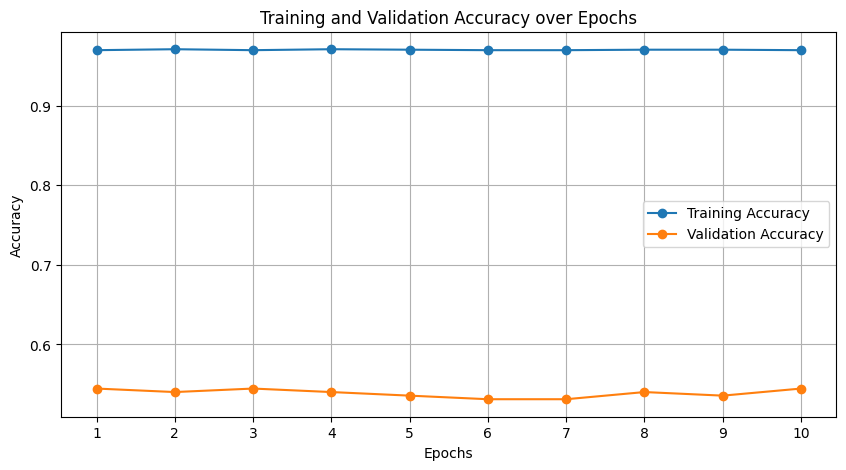

In [ ]:
import matplotlib.pyplot as plt

# Data from the user
epochs = list(range(1, 11))
train_accuracy = [0.9696, 0.9708, 0.9696, 0.9708, 0.9702, 0.9696, 0.9696, 0.9702, 0.9702, 0.9696]
val_accuracy = [0.5446, 0.5402, 0.5446, 0.5402, 0.5357, 0.5312, 0.5312, 0.5402, 0.5357, 0.5446]

# Creating the plot
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.grid(True)
plt.show()


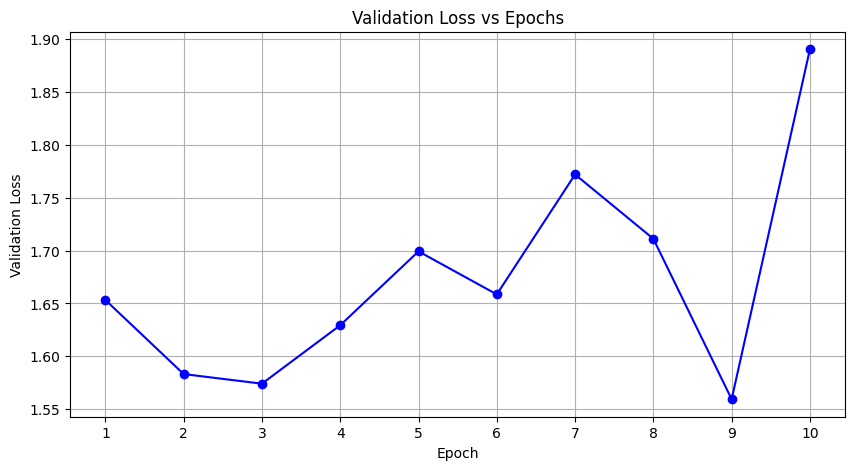

In [ ]:
import matplotlib.pyplot as plt

# Data for epochs and validation loss
epochs = list(range(1, 11))
val_loss = [1.6533, 1.5832, 1.5741, 1.6294, 1.6993, 1.6586, 1.7721, 1.7112, 1.5594, 1.8906]

# Creating the plot for validation loss across epochs
plt.figure(figsize=(10, 5))
plt.plot(epochs, val_loss, marker='o', linestyle='-', color='blue')
plt.title('Validation Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.grid(True)
plt.xticks(epochs)
plt.show()
